# Undervalued Apps

Exercise to find an undervalued paid Apps in order to generate more revenue

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
# our dataset consists of close to 11K apps and 13 variables
df.sample(5)

App  Category  Rating Reviews  Size    Installs  \
4221       Mobile Number Tracker     TOOLS     3.9   19758  2.9M  5,000,000+   
10512                Funny Jokes    FAMILY     3.9    2505  2.9M    100,000+   
8014                Morse Player    FAMILY     5.0      12  2.4M        100+   
7210   Grim Tales: The Wishes CE      GAME     4.3    4923   20M    100,000+   
9218         EB Cash Collections  BUSINESS     5.0       1  4.3M          5+   

       Type  Price Content Rating         Genres      Last Updated  \
4221   Free      0       Everyone          Tools  January 14, 2018   
10512  Free      0     Mature 17+  Entertainment     June 18, 2018   
8014   Paid  $1.99       Everyone      Education  January 23, 2017   
7210   Free      0   Everyone 10+      Adventure   August 26, 2015   
9218   Free      0       Everyone       Business     July 31, 2018   

      Current Ver   Android Ver  
4221          2.7    4.0 and up  
10512         1.2    4.1 and up  
8014        2.1.1    3.0 and up  
7210        1.0.0  2.3.3 and up  
9218         1.10    4.4 and up

In [4]:
df.shape

(10841, 13)

# Data Cleaning

In [5]:
# dropping row 10472 since the data is shifted for that record and it's a free app so we don't need it for this analysis
df.drop(labels=10472, inplace=True)

In [6]:
# some of these columns need to be integer type not objects
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
# removing the $ from the price column and converting it to a float
df['Price'] = df['Price'].str.replace('$','').astype('float')

In [8]:
# making a new df with only paid apps
paid = df[df['Price'] != 0].copy()

In [9]:
paid.shape

(800, 13)

In [10]:
paid.sample(3)

App Category  Rating Reviews  \
9728                           Sonic 4™ Episode I     GAME     3.7    8014   
1835                         Farming Simulator 18     GAME     4.5   18125   
4882  Math games for kids : times tables training   FAMILY     4.5     630   

      Size  Installs  Type  Price Content Rating                 Genres  \
9728   37M  100,000+  Paid   2.99       Everyone                 Arcade   
1835   15M  100,000+  Paid   4.99       Everyone   Simulation;Education   
4882  8.3M   10,000+  Paid   1.59       Everyone  Educational;Education   

       Last Updated         Current Ver   Android Ver  
9728  April 4, 2016               1.5.0    2.2 and up  
1835   July 9, 2018  Varies with device    4.4 and up  
4882  July 27, 2018               3.9.3  4.0.3 and up

In [11]:
# droppping the Type and column
paid.drop(columns='Type', inplace=True)

In [12]:
paid['Reviews'] = paid['Reviews'].astype('int')

In [13]:
# dropping duplicates
print("Number of rows before dropping duplicates: {}".format(paid.shape[0]))
paid.drop_duplicates(inplace=True)
print("Number of rows after dropping duplicates: {}".format(paid.shape[0]))

Number of rows before dropping duplicates: 800
Number of rows after dropping duplicates: 765


In [14]:
# checking by App name reveals there are still a few duplicates based on bad cagtegory data
paid.duplicated(subset='App').sum()

9

In [15]:
app_mask = paid["App"].isin(
    ["Fuzzy Numbers: Pre-K Number Foundation", "Toca Life: City"]
)

category_mask = paid["Category"] == "FAMILY"
paid[app_mask & category_mask]

App Category  Rating  Reviews Size  \
2151                         Toca Life: City   FAMILY     4.7    31100  24M   
4301  Fuzzy Numbers: Pre-K Number Foundation   FAMILY     4.7       21  44M   

      Installs  Price Content Rating                  Genres   Last Updated  \
2151  500,000+   3.99       Everyone  Education;Pretend Play   July 6, 2018   
4301    1,000+   5.99       Everyone     Education;Education  July 21, 2017   

     Current Ver Android Ver  
2151    1.5-play  4.4 and up  
4301         1.3  4.1 and up

In [16]:
# we need to drop the two rows above
paid.drop([2151, 4301], inplace=True)
paid.duplicated(subset='App').sum()

7

In [17]:
# we still have some other dups to drop
paid.sort_values(by='Reviews', ascending=False, inplace=True)

In [18]:
# dropping all duplicates and keeping the record with the highets reviews (since we sorted already)
paid.drop_duplicates(subset='App', keep='first', inplace=True)

In [19]:
# checking one last time to make sure all duplicates have been eliminated
paid.duplicated('App').sum()

0

In [20]:
# resetting the index and dropping the old index
paid.reset_index(drop=True, inplace=True)

In [21]:
paid.shape

(756, 12)

### Data Exploration

In [22]:
# plotting the price column shows us the data is heavily skewed to the left 
paid.hist(column='Price', grid=False, figsize=(12, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027983F0D9B0>]],
      dtype=object)

In [23]:
# looking at high prices
paid.sort_values(by='Price', ascending=False).head(5)

App   Category  Rating  Reviews  Size  \
277        I'm Rich - Trump Edition  LIFESTYLE     3.6      275  7.3M   
207                  I am Rich Plus     FAMILY     4.0      856  8.7M   
355  I am rich (Most expensive app)    FINANCE     4.1      129  2.7M   
371                      I am Rich!    FINANCE     3.8       93   22M   
155               I Am Rich Premium    FINANCE     4.1     1867  4.7M   

    Installs   Price Content Rating         Genres       Last Updated  \
277  10,000+  400.00       Everyone      Lifestyle        May 3, 2018   
207  10,000+  399.99       Everyone  Entertainment       May 19, 2018   
355   1,000+  399.99           Teen        Finance   December 6, 2017   
371   1,000+  399.99       Everyone        Finance  December 11, 2017   
155  50,000+  399.99       Everyone        Finance  November 12, 2017   

    Current Ver   Android Ver  
277       1.0.1    4.1 and up  
207         3.0    4.4 and up  
355           2  4.0.3 and up  
371         1.0    4.1 and up  
155         1.6    4.0 and up

In [24]:
# restricting our analysis to apps under $50 to disregard outliers and capture most of the data
affordable_apps = paid[paid['Price'] < 50].copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279850899E8>]],
      dtype=object)

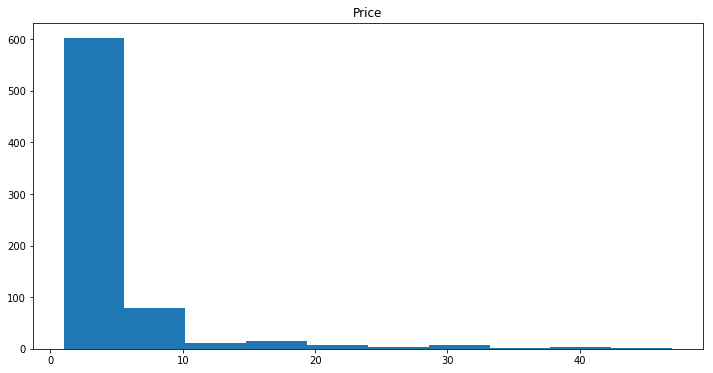

In [25]:
# plotting the distribution still shows a heavy skew to the left
affordable_apps.hist(column='Price', grid=False, figsize=(12,6))

In [26]:
# the data is still skewed so let's create a mask for cheap apps that cost less than $5
cheap = affordable_apps['Price'] < 5
reasonable = affordable_apps['Price'] >= 5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002798513C128>]],
      dtype=object)

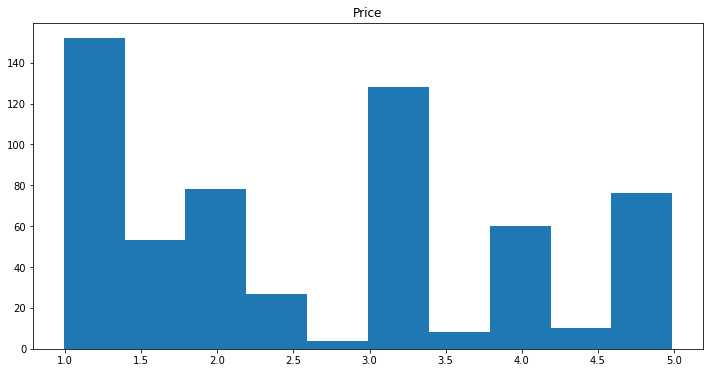

In [27]:
# plotting the cheap apps shows a distribution around 1,2,3,4,5 $ prices
affordable_apps[cheap].hist(column='Price', grid=False, figsize=(12,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027985133438>]],
      dtype=object)

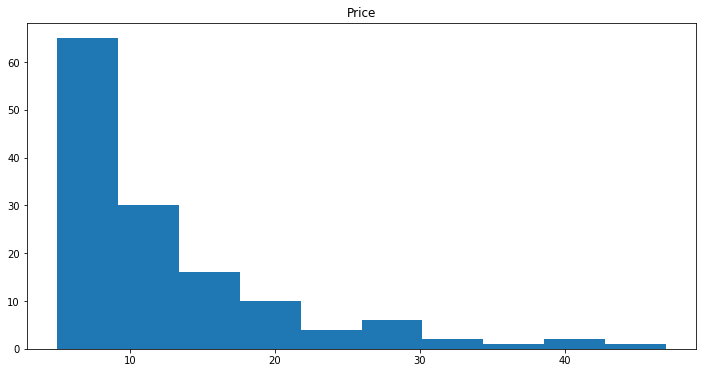

In [28]:
# plotting our reasonable apps shows less of a skew
affordable_apps[reasonable].hist(column='Price', grid=False, figsize=(12,6))

In [29]:
# creating a new column based on our masks with value of 'cheap' if < 5 and 'reasonable' otherwise
affordable_apps['affordability'] = affordable_apps['Price'].apply(lambda x: 'cheap' if x < 5 else  'reasonable')

In [30]:
affordable_apps.head()

App Category  Rating  Reviews  \
0                      Minecraft   FAMILY     4.5  2376564   
1                  Hitman Sniper     GAME     4.6   408292   
2  Grand Theft Auto: San Andreas     GAME     4.4   348962   
3                    Bloons TD 5   FAMILY     4.6   190086   
4              Where's My Water?   FAMILY     4.7   188740   

                 Size     Installs  Price Content Rating  \
0  Varies with device  10,000,000+   6.99   Everyone 10+   
1                 29M  10,000,000+   0.99     Mature 17+   
2                 26M   1,000,000+   6.99     Mature 17+   
3                 94M   1,000,000+   2.99       Everyone   
4                 69M   1,000,000+   1.99       Everyone   

                      Genres    Last Updated Current Ver         Android Ver  \
0  Arcade;Action & Adventure   July 24, 2018     1.5.2.1  Varies with device   
1                     Action   July 12, 2018  1.7.110758          4.1 and up   
2                     Action  March 21, 2015        1.08          3.0 and up   
3                   Strategy   July 13, 2018        3.16        2.3.3 and up   
4         Puzzle;Brain Games    July 5, 2018      1.16.0          4.2 and up   

  affordability  
0    reasonable  
1         cheap  
2    reasonable  
3         cheap  
4         cheap

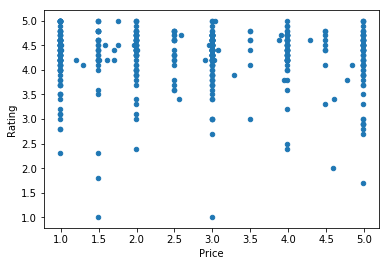

In [31]:
# plotting price vs rating for cheap apps doesn't show a clear correlation
affordable_apps[cheap].plot(kind='scatter', x='Price', y='Rating')

In [32]:
# let's figure out the correlation between price and rating
affordable_apps[cheap].corr().loc['Rating', 'Price']

-0.05593771505463038

In [33]:
# since there is very little correlation we should be able to change the cost of apps with a price less than 
# the mean to the mean wihtout impacting teh ratings
cheap_mean = affordable_apps[cheap]['Price'].mean()
cheap_mean

2.580318791946309

In [34]:
# adding a new column that flags those apps that are less than the cheap mean price
affordable_apps['price_criterion'] = affordable_apps[cheap]['Price'].apply(lambda x: 1 if x < cheap_mean else 0)

In [35]:
affordable_apps.head()

App Category  Rating  Reviews  \
0                      Minecraft   FAMILY     4.5  2376564   
1                  Hitman Sniper     GAME     4.6   408292   
2  Grand Theft Auto: San Andreas     GAME     4.4   348962   
3                    Bloons TD 5   FAMILY     4.6   190086   
4              Where's My Water?   FAMILY     4.7   188740   

                 Size     Installs  Price Content Rating  \
0  Varies with device  10,000,000+   6.99   Everyone 10+   
1                 29M  10,000,000+   0.99     Mature 17+   
2                 26M   1,000,000+   6.99     Mature 17+   
3                 94M   1,000,000+   2.99       Everyone   
4                 69M   1,000,000+   1.99       Everyone   

                      Genres    Last Updated Current Ver         Android Ver  \
0  Arcade;Action & Adventure   July 24, 2018     1.5.2.1  Varies with device   
1                     Action   July 12, 2018  1.7.110758          4.1 and up   
2                     Action  March 21, 2015        1.08          3.0 and up   
3                   Strategy   July 13, 2018        3.16        2.3.3 and up   
4         Puzzle;Brain Games    July 5, 2018      1.16.0          4.2 and up   

  affordability  price_criterion  
0    reasonable              NaN  
1         cheap              1.0  
2    reasonable              NaN  
3         cheap              0.0  
4         cheap              1.0

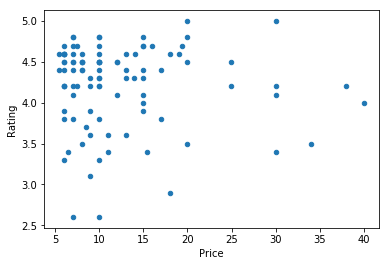

In [36]:
# plotting price vs rating for reasonable apps also doesn't show a clear correlation
affordable_apps[reasonable].plot(kind='scatter', x='Price', y='Rating')

In [37]:
# the correlation for reasonable apps is also very low
affordable_apps[reasonable].corr().loc['Rating', 'Price']

-0.048609647085130735

In [38]:
# finding the mean of the reasonable subset
reasonable_mean = affordable_apps[reasonable]['Price'].mean()
reasonable_mean

12.44868613138686

In [39]:
# flagging the reasonable apps that are less than the reasonable mean
affordable_apps.loc[reasonable,'price_criterion'] = affordable_apps['Price'].apply(lambda x: 1 if x < reasonable_mean else 0)

In [40]:
affordable_apps.sample(3)

App Category  Rating  \
698  Private Dating, Hide App- Blue for PrivacyHider   DATING     NaN   
315                                      Dots puzzle   FAMILY     4.0   
587           Chess of Blades (BL/Yaoi Game) (No VA)   FAMILY     4.8   

     Reviews Size Installs  Price Content Rating  Genres      Last Updated  \
698        0  18k     100+   2.99       Everyone  Dating     July 25, 2017   
315      179  14M  50,000+   0.99       Everyone  Puzzle    April 18, 2018   
587        4  23M      10+  14.99           Teen  Casual  January 24, 2018   

    Current Ver   Android Ver affordability  price_criterion  
698       1.0.1    4.0 and up         cheap              0.0  
315         NaN    4.0 and up         cheap              1.0  
587        1.03  2.3.3 and up    reasonable              0.0

In [41]:
# reviewing data in the genre column which is separated by ';'
affordable_apps['Genres'].unique()

array(['Arcade;Action & Adventure', 'Action', 'Strategy',
       'Puzzle;Brain Games', 'Card;Action & Adventure', 'Sports',
       'Personalization', 'Arcade', 'Puzzle', 'Productivity', 'Weather',
       'Tools', 'Sports;Action & Adventure', 'Communication',
       'Role Playing', 'Photography', 'Card', 'Simulation;Education',
       'Adventure', 'Education;Pretend Play', 'Lifestyle',
       'Strategy;Action & Adventure', 'Board', 'Finance',
       'Health & Fitness', 'Role Playing;Action & Adventure', 'Music',
       'Travel & Local', 'Business', 'Simulation',
       'Adventure;Action & Adventure', 'Parenting',
       'Adventure;Brain Games', 'Entertainment', 'Maps & Navigation',
       'Video Players & Editors', 'Racing', 'Medical', 'Auto & Vehicles',
       'Educational;Pretend Play', 'Casual;Pretend Play',
       'Education;Creativity', 'Education', 'Board;Brain Games',
       'Food & Drink', 'Action;Action & Adventure',
       'Simulation;Pretend Play', 'Dating', 'Books & Referenc

In [42]:
# creating a column to count the number of genres
affordable_apps['genre_count'] = affordable_apps['Genres'].str.count(';')+1

In [43]:
# getting the mean by affordability and genre count
genre_mean = affordable_apps.groupby(['affordability', 'genre_count']).mean()[['Price']]
genre_mean

Price
affordability genre_count           
cheap         1             2.507448
              2             3.155672
reasonable    1            12.574627
              2             6.823333

In [44]:
# labeling each segment in 'genres_mean'
def label_genres(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genre_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

affordable_apps["genre_criterion"] = affordable_apps.apply(
    label_genres, axis='columns')

In [45]:
# getting the mean by affordability and Categoriy
categories_mean = affordable_apps.groupby(['affordability', 'Category']).mean()[['Price']]
categories_mean.head()

Price
affordability Category                     
cheap         ART_AND_DESIGN       1.990000
              AUTO_AND_VEHICLES    1.740000
              BOOKS_AND_REFERENCE  2.529286
              BUSINESS             3.632857
              COMMUNICATION        2.428846

In [46]:
# labeling each segment in 'categories_mean'
def label_categories(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    ct = row["Category"]
    price = row["Price"]

    if price < categories_mean.loc[(aff, ct)][0]:
        return 1
    else:
        return 0

affordable_apps["category_criterion"] = affordable_apps.apply(
    label_categories, axis='columns')

In [47]:
affordable_apps.head(3)

App Category  Rating  Reviews  \
0                      Minecraft   FAMILY     4.5  2376564   
1                  Hitman Sniper     GAME     4.6   408292   
2  Grand Theft Auto: San Andreas     GAME     4.4   348962   

                 Size     Installs  Price Content Rating  \
0  Varies with device  10,000,000+   6.99   Everyone 10+   
1                 29M  10,000,000+   0.99     Mature 17+   
2                 26M   1,000,000+   6.99     Mature 17+   

                      Genres    Last Updated Current Ver         Android Ver  \
0  Arcade;Action & Adventure   July 24, 2018     1.5.2.1  Varies with device   
1                     Action   July 12, 2018  1.7.110758          4.1 and up   
2                     Action  March 21, 2015        1.08          3.0 and up   

  affordability  price_criterion  genre_count  genre_criterion  \
0    reasonable              1.0            2                0   
1         cheap              1.0            1                1   
2    reasonable              1.0            1                1   

   category_criterion  
0                   1  
1                   1  
2                   1

In [48]:
# we now have 3 criterion columns to use to segment which apps to apply price increases
# creating a criteria to select the value with the most results; majority voting
criteria = ['price_criterion', 'genre_criterion', 'category_criterion']
affordable_apps['Result'] = affordable_apps[criteria].mode(axis='columns')

affordable_apps.sample(5)

App         Category  Rating  \
583               California Cop Assist CA Cop     PRODUCTIVITY     3.0   
197             G Cloud Apps Backup Key * root            TOOLS     4.5   
596                      Obbligo o Verità? PRO             GAME     NaN   
665  Técnico Legislativo Câmara Legislativa DF     PRODUCTIVITY     NaN   
397                   Color Changer Pro [root]  PERSONALIZATION     4.5   

     Reviews  Size Installs  Price Content Rating           Genres  \
583        5  7.0M     100+   4.99       Everyone     Productivity   
197     1034  196k   5,000+   4.99       Everyone            Tools   
596        4  2.9M     100+   0.99           Teen            Board   
665        1   10M      10+   2.99       Everyone     Productivity   
397       69  951k   1,000+   0.99       Everyone  Personalization   

          Last Updated Current Ver   Android Ver affordability  \
583  February 11, 2014         1.3    2.2 and up         cheap   
197  September 8, 2013         1.1    2.2 and up         cheap   
596     April 26, 2018        1,01    3.0 and up         cheap   
665      June 29, 2018         6.0  4.0.3 and up         cheap   
397   January 12, 2017        1.11    4.4 and up         cheap   

     price_criterion  genre_count  genre_criterion  category_criterion  Result  
583              0.0            1                0                   0     0.0  
197              0.0            1                0                   0     0.0  
596              1.0            1                1                   1     1.0  
665              0.0            1                0                   0     0.0  
397              1.0            1                1                   1     1.0

In [49]:
# checking how many apps are eligible for a price increase based on majority voting
nr_eligible = affordable_apps['Result'].sum()
nr_eligible

401.0

In [50]:
# 54.7% are eligible for a price increase
print(nr_eligible, nr_eligible/affordable_apps.shape[0], sep='\n')

401.0
0.5470668485675307


# Assessing the impact

In [51]:
# creating a new column which is the max of Price or the cheap_mean for cheap apps or max of Price or reasonable_mean for reasonable apps
affordable_apps.loc[cheap, 'New Price'] = affordable_apps['Price'].apply(lambda x: cheap_mean if x < cheap_mean else x).round(2)
affordable_apps.loc[reasonable, 'New Price'] = affordable_apps['Price'].apply(lambda x: reasonable_mean if x < reasonable_mean else x).round(2)

In [52]:
affordable_apps.head()

App Category  Rating  Reviews  \
0                      Minecraft   FAMILY     4.5  2376564   
1                  Hitman Sniper     GAME     4.6   408292   
2  Grand Theft Auto: San Andreas     GAME     4.4   348962   
3                    Bloons TD 5   FAMILY     4.6   190086   
4              Where's My Water?   FAMILY     4.7   188740   

                 Size     Installs  Price Content Rating  \
0  Varies with device  10,000,000+   6.99   Everyone 10+   
1                 29M  10,000,000+   0.99     Mature 17+   
2                 26M   1,000,000+   6.99     Mature 17+   
3                 94M   1,000,000+   2.99       Everyone   
4                 69M   1,000,000+   1.99       Everyone   

                      Genres    Last Updated Current Ver         Android Ver  \
0  Arcade;Action & Adventure   July 24, 2018     1.5.2.1  Varies with device   
1                     Action   July 12, 2018  1.7.110758          4.1 and up   
2                     Action  March 21, 2015        1.08          3.0 and up   
3                   Strategy   July 13, 2018        3.16        2.3.3 and up   
4         Puzzle;Brain Games    July 5, 2018      1.16.0          4.2 and up   

  affordability  price_criterion  genre_count  genre_criterion  \
0    reasonable              1.0            2                0   
1         cheap              1.0            1                1   
2    reasonable              1.0            1                1   
3         cheap              0.0            1                0   
4         cheap              1.0            2                1   

   category_criterion  Result  New Price  
0                   1     1.0      12.45  
1                   1     1.0       2.58  
2                   1     1.0      12.45  
3                   0     0.0       2.99  
4                   1     1.0       2.58

In [53]:
# transforming Installs into a numeric column
affordable_apps['Installs'] = affordable_apps['Installs'].str.replace('+','').str.replace(',','').astype(int)

In [54]:
# impact
affordable_apps['Impact'] = (affordable_apps['New Price'] - affordable_apps['Price']) * affordable_apps['Installs']

In [55]:
affordable_apps.head(3)

App Category  Rating  Reviews  \
0                      Minecraft   FAMILY     4.5  2376564   
1                  Hitman Sniper     GAME     4.6   408292   
2  Grand Theft Auto: San Andreas     GAME     4.4   348962   

                 Size  Installs  Price Content Rating  \
0  Varies with device  10000000   6.99   Everyone 10+   
1                 29M  10000000   0.99     Mature 17+   
2                 26M   1000000   6.99     Mature 17+   

                      Genres    Last Updated Current Ver         Android Ver  \
0  Arcade;Action & Adventure   July 24, 2018     1.5.2.1  Varies with device   
1                     Action   July 12, 2018  1.7.110758          4.1 and up   
2                     Action  March 21, 2015        1.08          3.0 and up   

  affordability  price_criterion  genre_count  genre_criterion  \
0    reasonable              1.0            2                0   
1         cheap              1.0            1                1   
2    reasonable              1.0            1                1   

   category_criterion  Result  New Price      Impact  
0                   1     1.0      12.45  54600000.0  
1                   1     1.0       2.58  15900000.0  
2                   1     1.0      12.45   5460000.0

In [56]:
total_impact = affordable_apps['Impact'].sum()
total_impact

115441618.98

# Total impact could be up to $115 million. 

There are other variables in our dataset that can be used to shed light on this analysis, like the number of reviews, size of the app, and last updated date.